**European Bank Dataset**

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

**Attribute Information:**

1. age 

2. job : type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital : marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: Does the customer have credit in default? ( "no","yes","unknown")

6. Balance: balance of the customer

7. housing: Does the customer have a housing loan? ("no","yes","unknown")

8. loan: Does the customer have a personal loan? "no","yes","unknown")

**Related with the last contact of the current campaign:**
9. Contact: contact communication type ("cellular","telephone") 

10. Month: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")

11. day_of_week: last contact day of the week ("mon","tue","wed","thu","fri")

12. Duration: last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
13. Campaign: Number of contacts performed during this campaign and for this client includes last contact

14. pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

15. Previous: number of contacts performed before this campaign and for this client

16. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**Outcome variable:**
17. y - has the client subscribed to a term deposit? ("yes","no")

Now I will do the analysis on the given data set.

**Load libraries and read the data**

In [2]:
import numpy as np  # As required for pandas
import pandas as pd # importing pandas to read the data
import matplotlib.pyplot as plt # importing pyplot for visualization
import seaborn as sns # importing seaborn for visualization
import missingno as msno # importing missingno for exploratory visualization of missing data.
from matplotlib import rcParams # import rcParams library
import sklearn #importing sklearn library

**Reading datafiles and combining them**

Reading the data from bank-full file.

In [3]:
file1 = pd.read_csv('/content/bank-full.csv', sep=';', quotechar='"',encoding='utf-8')
file1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Reading the data from bank file




In [4]:
file2 = pd.read_csv("/content/bank.csv", sep=';', quotechar='"',encoding='utf-8')# reading file 1
file2.shape # shape of the file

(4521, 17)

As mentioned in the project i will combine them(file1 and file2).

In [5]:
df = file1.append(file2) # merging two files
df.head() # first five records of the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


I combined those files. Now I can see the shape of my data

shape: It will help us to find number of rows and columns in a dataframe.

In [6]:
df.shape # number of columns and rows

(49732, 17)

Now, As mentioned in the project I combined the dataset. But bank(file2) is 10% of ramdom data from the file bank-full(file1). I combined those files so I have some  10% duplicated data.So I want to remove those duplicates from my data. To remove the duplicates i will use drop_duplicates funciton.

drop_duplicates(): It helps us to remove duplicates from the dataframe.

In [7]:
df = df.drop_duplicates() # to remove duplicates
df.shape # number of columns and rows

(45211, 17)

Now we can see the information about the data. For this we can use info function.

**Info:** It tells the information about the dataset.Information consists of  number of rows, number of columns and data type of the columns.

In [8]:
df.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


I will check null values in the given dataset by using null function

**Null:** null function is used to provide the number of null values in each column in dataframe.

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So, There are no null values in the given dataset.

**Basic Exploration and Exploratory Data Analysis**

Now, I will check the statistical summary of the given dataset by using describe function.

**Describe:** It will give count, mean, std, 25%, 50%, 75%, max value of all numerical colums of the dataset.

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Now, As mentioned in the project 


pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

so here currently in pdays column value -1 indiates clien was not previously contacted. So here I will replace that -1 with 999.

In [11]:
df.loc[(df.pdays < 0), 'pdays'] = 999 # replacign -1 with 999 by using .loc function
df.head() # to display first five records of the df.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,999,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,999,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,999,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,999,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,999,0,unknown,no


Now, I will check all the unique values in all the columns by using unique function

**unique():** It helps us to find unique values in each column of a dataframe.

In [12]:
for i in df.columns: # for loop to print all unique values of all columns in the df dataframe.
  print(i,df[i].unique()) # to print the unique values with column name.

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

Here, I found education and job with the value unknown. So here unknown is not possible so I'm treating that unknown as missing value now i will calculate occurance of each value by using value_counts function.

**value_counts():**It helps us to findout the number of occurances of each value in a specific column.

In [13]:
df['education'].value_counts() # to count each unique values

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Now, I found 1857 unknown values and I will replace those values with NaN's.

In [14]:
df['education'] = df['education'].replace('unknown', np.NaN) # replacing with NaN's
df['education'].value_counts() # to count each unique values

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

Replaced those values with NaN's. I will check null values now.

In [15]:
df['education'].isnull().sum() # to check null values

1857

Here my unknown values are replace with NaN's. So here education is categorical variable so I with replace all NaN's with mode().

For, categorical data mode() is the best choice to replace the null values.

In [16]:
df['education'] = df['education'].fillna(df['education'].mode()[0]) # replacing null values with mode.
df['education'].isnull().sum() # checking for null values are replace with mode or not.

0

Now, I will check whether unknown value is replace with mode or not.

In [17]:
df['education'].value_counts()  # to count each unique values

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

Yes, Unknown value is replace with mode(secondary) successfully.

Now, I will do the same process for job also.

In [18]:
df['job'].value_counts() # to count each unique values

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Now, I found 288 unknown values and  first of all I will replace those values with NaN's.

In [19]:
df['job'] = df['job'].replace('unknown', np.NaN) # replacign with nan values.
df['job'].value_counts() # to count each unique values

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

Replaced those values with NaN's. I will check null values now.

In [20]:
df['job'].isnull().sum()

288

Here my unknown values are replace with NaN's. So here job is categorical variable so I will replace all NaN's with mode().

For, categorical data mode() is the best choice to replace the null values.

In [21]:
df['job'] = df['job'].fillna(df['job'].mode()[0]) # replacing with null values
df['job'].isnull().sum() # to check whether nan values are replaced with mode or not.

0

successfully nan values are  replace with mode. Now I will check.

In [22]:
df['job'].value_counts() # to count each unique values

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

Unknown values are replaced with the mode successfully.

Now, I will check poutcome column.

In [23]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

 poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

 So, in this column there is no chance occurance unknown value so I'm teating that as a missing value. I will replace unknown value with nan value.

In [24]:
df['poutcome'] = df['poutcome'].replace('unknown', np.NaN) # replacign with nan values.
df['poutcome'].value_counts() # to count each unique values

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

Replaced those values with NaN's. I will check null values now.

In [25]:
df['poutcome'].isnull().sum()

36959

Here my unknown values are replace with NaN's. So here poutcome is categorical variable so I will replace all NaN's with mode().

For, categorical data mode() is the best choice to replace the null values.

In [26]:
df['poutcome'] = df['poutcome'].fillna(df['poutcome'].mode()[0]) # replacing with null values
df['poutcome'].isnull().sum() # to check whether nan values are replaced with mode or not.

0

successfully nan values are  replace with mode. Now I will check.

In [27]:
df['poutcome'].value_counts() # to count each unique values

failure    41860
other       1840
success     1511
Name: poutcome, dtype: int64

Unknown value is replaced with the mode successfully.

**Univariate Analysis to see the distribution of all variables :**

Numerical Columns:

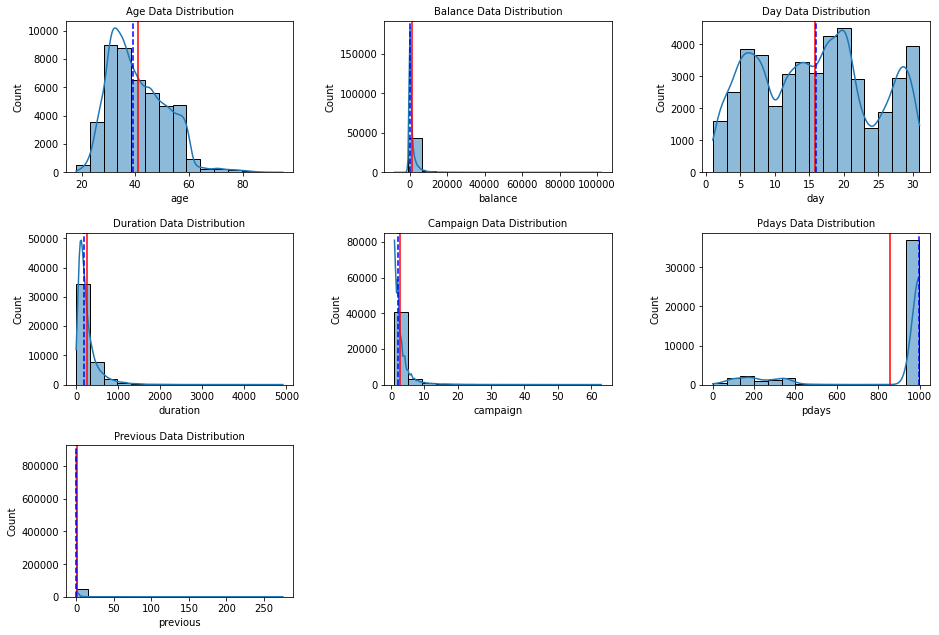

In [28]:
# To see the distribution of each columns
plt.figure(figsize=(15,10)) # Figure Size
plt.subplot(3,3,1)
sns.histplot(df['age'], kde=True,bins=15) # histogram for age column
plt.axvline(x=df.age.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.age.median(),c='blue',ls='--',label='Median') # To show the Median 
plt.title("Age Data Distribution", fontsize=10) # title of the plot

plt.subplot(3,3,2)
sns.histplot(df['balance'],kde=True, bins=15)# to show the distribution of the balance variable
plt.axvline(x=df.balance.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.balance.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Balance Data Distribution", fontsize=10) # title of the plot

plt.subplot(3,3,3)
sns.histplot(df['day'],kde=True,bins=15)# to show the distribution of the day variable
plt.axvline(x=df.day.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.day.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Day Data Distribution", fontsize=10) # title of the plot


plt.subplot(3,3,4)
sns.histplot(df['duration'],kde=True,bins=15)# to show the distribution of the duration variable
plt.axvline(x=df.duration.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.duration.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Duration Data Distribution", fontsize=10) # title of the plot

plt.subplot(3,3,5)
sns.histplot(df['campaign'],kde=True,bins=15)# to show the distribution of the campaign variable
plt.axvline(x=df.campaign.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.campaign.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Campaign Data Distribution", fontsize=10)# title of the plot

plt.subplot(3,3,6)
sns.histplot(df['pdays'],kde=True,bins=15)# to show the distribution of the pdays variable
plt.axvline(x=df.pdays.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.pdays.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Pdays Data Distribution", fontsize=10)# title of the plot

plt.subplot(3,3,7)
sns.histplot(df['previous'],kde=True,bins='auto')# to show the distribution of the previous variable
plt.axvline(x=df.previous.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.previous.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Previous Data Distribution", fontsize=10) #title of the plot

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) # used to adjust the space between subplots.

plt.show()

By looking at the above distributions these are my observations:

1. some columns of the data in the above graph is not normally distibuted.
2. we have some outliers in age, pdays, etc,..

Going forward I will try to findout the outliers in the each numerical column by using box plot and I will fix those outliers.

Categorical Columns:

Here, For all categorical columns i will show the distribution according to the deposit and non deposit category. Because my outcome variable is term deposit that is my variable 'y'.

Text(0.5, 1.0, 'Distribution of the job variable')

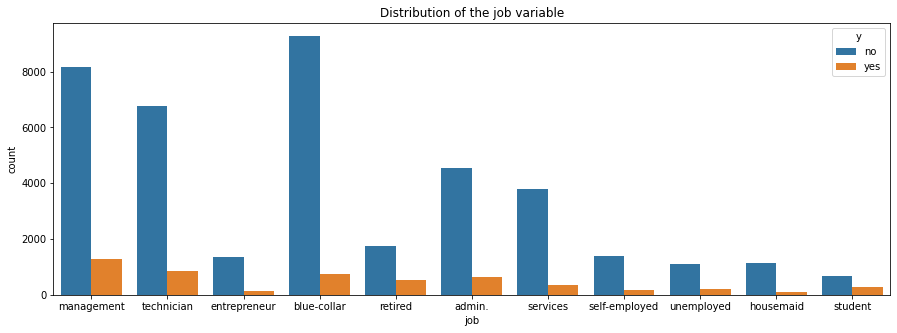

In [29]:
plt.figure(figsize=(15,5)) # figure size
sns.countplot(x='job', hue='y', data=df) # to examine the relation ship between deposit & non deposit
plt.title("Distribution of the job variable") # title of the plot

# no mean no_deposit
# yes mean deposit

Regarding the diagrams we can tell that according to our dataset:

Customers with 'management' and 'blue-collar' jobs are less likely to subscribe for term deposit.


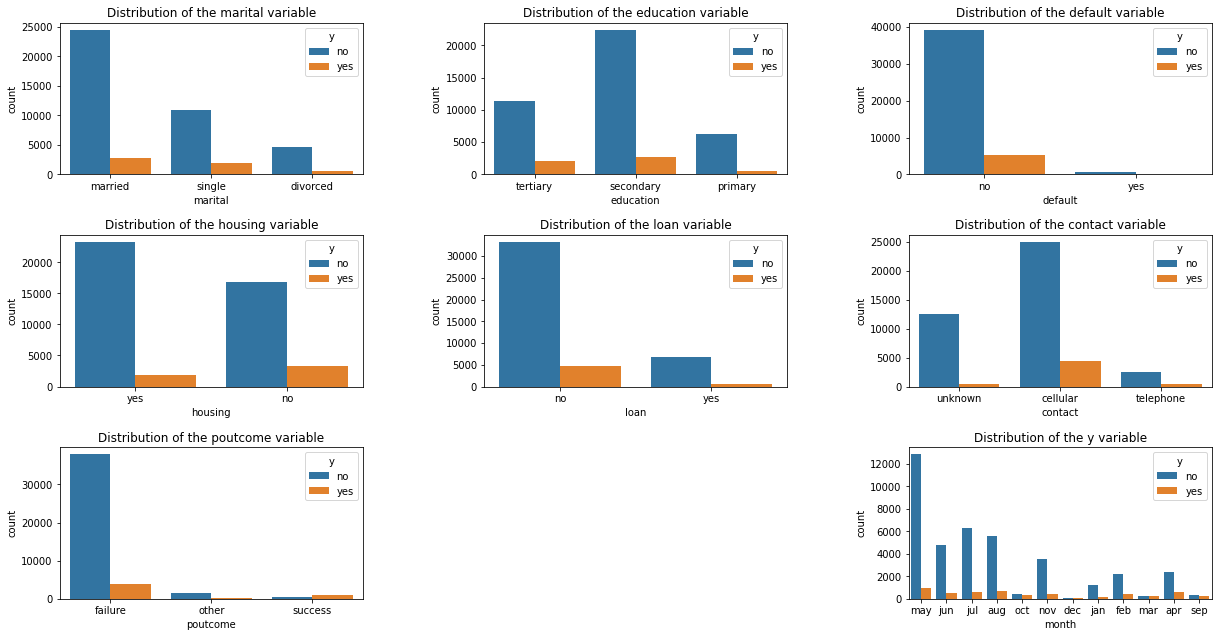

In [30]:
plt.figure(figsize=(20,10)) # Figure Size

plt.subplot(3,3,1)
sns.countplot(x='marital', hue='y', data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the marital variable") # title of the plot


plt.subplot(3,3,2)
sns.countplot(x='education', hue='y', data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the education variable") # title of the plot


plt.subplot(3,3,3)
sns.countplot(x='default', hue='y',data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the default variable") # title of the plot


plt.subplot(3,3,4)
sns.countplot(x='housing', hue='y', data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the housing variable") # title of the plot


plt.subplot(3,3,5)
sns.countplot(x='loan', hue='y', data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the loan variable") # title of the plot


plt.subplot(3,3,6)
sns.countplot(x='contact', hue='y', data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the contact variable") # title of the plot


plt.subplot(3,3,7)
sns.countplot(x='poutcome', hue='y', data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the poutcome variable") # title of the plot

plt.subplot(3,3,9)
sns.countplot(x='month', hue='y',data=df)# to examine the relation ship between deposit & non deposit
plt.title("Distribution of the y variable") # title of the plot

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) # used to adjust the space between subplots.


In the above graphs, I can say that seeing the distribution of the categorical columns with the outcome variable y.

1. Married customers are less likely to subscribe for term deposit.
 compare with single and divorced
3. Secondary educatiON people are more likely to subscribe for    the  term depositcompare to tertiary and primary

4. Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

Text(0.5, 1.0, 'Popoutcome of the y variable')

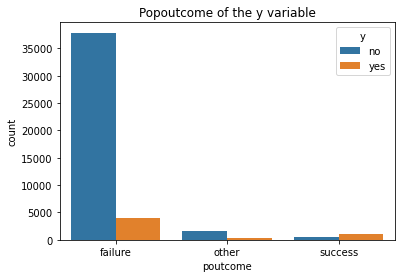

In [31]:
sns.countplot(x='poutcome', hue='y',data=df) # to examine the relation ship between deposit & non deposit
plt.title("Popoutcome of the y variable")  # title of the plot

**Bivariate Analysis**

**1. Explore categorical features**

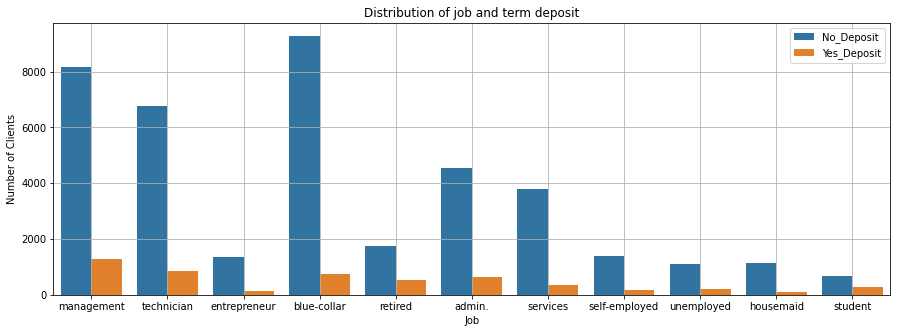

In [32]:
plt.figure(figsize=(15,5)) # Figure Size
sns.countplot(x ='job', hue = "y", data = df ) # Examining the relationship between job and outcome variable y.
plt.title('Distribution of job and term deposit') # title of the plot
plt.xlabel('Job') # title of the x label
plt.ylabel('Number of Clients') # title of the y lable
plt.legend(labels = ['No_Deposit', 'Yes_Deposit'], loc="upper right") # adding legend for labels
plt.grid()
plt.show()

Observations:

Management staff have opened the deposit most of all.

Maximum number of people are not opend term deposit are belongs to blue-collar profession

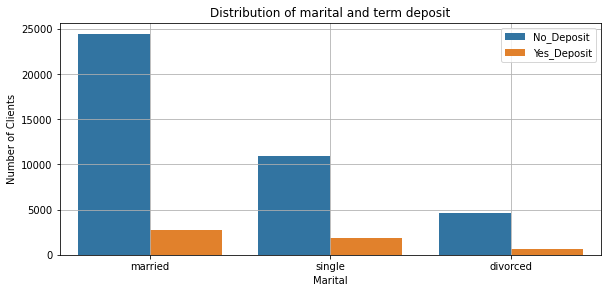

In [33]:
rcParams['figure.figsize'] = 9.7,4.27 # we can fix the size of the figure
sns.countplot(x ='marital', hue = "y", data = df ) # Examining the relationship between job and outcome variable y.
plt.title('Distribution of marital and term deposit')
plt.xlabel('Marital')
plt.ylabel('Number of Clients')
plt.legend(labels = ['No_Deposit', 'Yes_Deposit'], loc="upper right")
plt.grid()
plt.show()

Observations:

Married customers are less likely to subscribe for term deposit.
 compare with single and divorced 

Although in absolute terms married consumers more often agreed to the service, in relative terms the divorced were responded better.

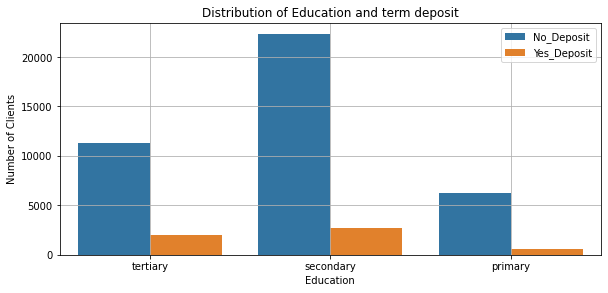

In [34]:
rcParams['figure.figsize'] = 9.7,4.27 # we can fix the size of the figure
sns.countplot(x ='education', hue = "y", data = df ) # Examining the relationship between job and outcome variable y.
plt.title('Distribution of Education and term deposit')
plt.xlabel('Education')
plt.ylabel('Number of Clients')
plt.legend(labels = ['No_Deposit', 'Yes_Deposit'], loc="upper right")
plt.grid()
plt.show()

Observation:

 Secondary education people are less likely to subscribe for    the  term depositcompare to tertiary and primary

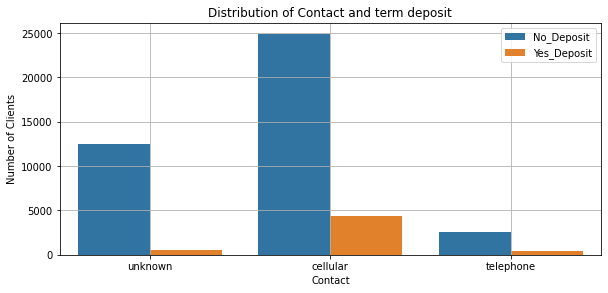

In [35]:
rcParams['figure.figsize'] = 9.7,4.27 # we can fix the size of the figure
sns.countplot(x ='contact', hue = "y", data = df ) # Examining the relationship between job and outcome variable y.
plt.title('Distribution of Contact and term deposit')
plt.xlabel('Contact')
plt.ylabel('Number of Clients')
plt.legend(labels = ['No_Deposit', 'Yes_Deposit'], loc="upper right")
plt.grid()
plt.show()

Observations:

Customers with 'cellular' type of contact are less likely to subscribe for term deposit.


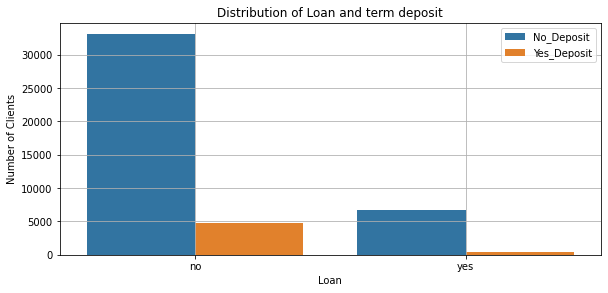

In [36]:
rcParams['figure.figsize'] = 9.7,4.27 # we can fix the size of the figure
sns.countplot(x ='loan', hue = "y", data = df ) # Examining the relationship between job and outcome variable y.
plt.title('Distribution of Loan and term deposit')
plt.xlabel('Loan')
plt.ylabel('Number of Clients')
plt.legend(labels = ['No_Deposit', 'Yes_Deposit'], loc="upper right")
plt.grid()
plt.show()

Observations:
the people who are not taking loan less likely to subscribe for the term deposit.



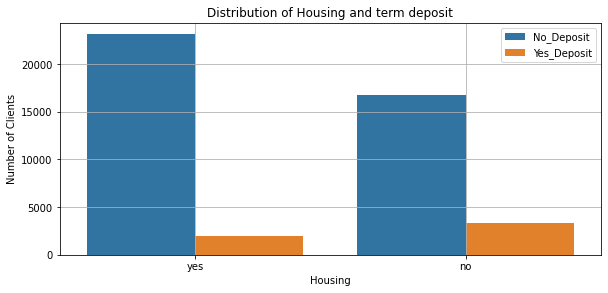

In [37]:
rcParams['figure.figsize'] = 9.7,4.27 # we can fix the size of the figure
sns.countplot(x ='housing', hue = "y", data = df ) # Examining the relationship between job and outcome variable y.
plt.title('Distribution of Housing and term deposit')
plt.xlabel('Housing')
plt.ylabel('Number of Clients')
plt.legend(labels = ['No_Deposit', 'Yes_Deposit'], loc="upper right")
plt.grid()
plt.show()

Observations:

Home ownership does not greatly affect marketing company performance.


**2. Explore numerical features**

For doing this I have to convert my outcome 'y' column to numerical.

In [38]:
df['y']=df['y'].map({'no':0, 'yes':1})
df['y'].unique()

array([0, 1])

Now, we have to check whether the data type of y column has changed or not.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 7.2+ MB


Yes, y column data type is changed to int64 now we can start our analysis.

In [40]:
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.008804,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,-0.037360,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,0.079074,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.005090,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,0.108306,-0.032855,-0.073172
pdays,-0.008804,-0.037360,0.079074,-0.005090,0.108306,1.000000,-0.528910,-0.178898
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,-0.528910,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,-0.178898,0.093236,1.000000


From correlation matrix we observed that:

most correlated with target feature is call duration.

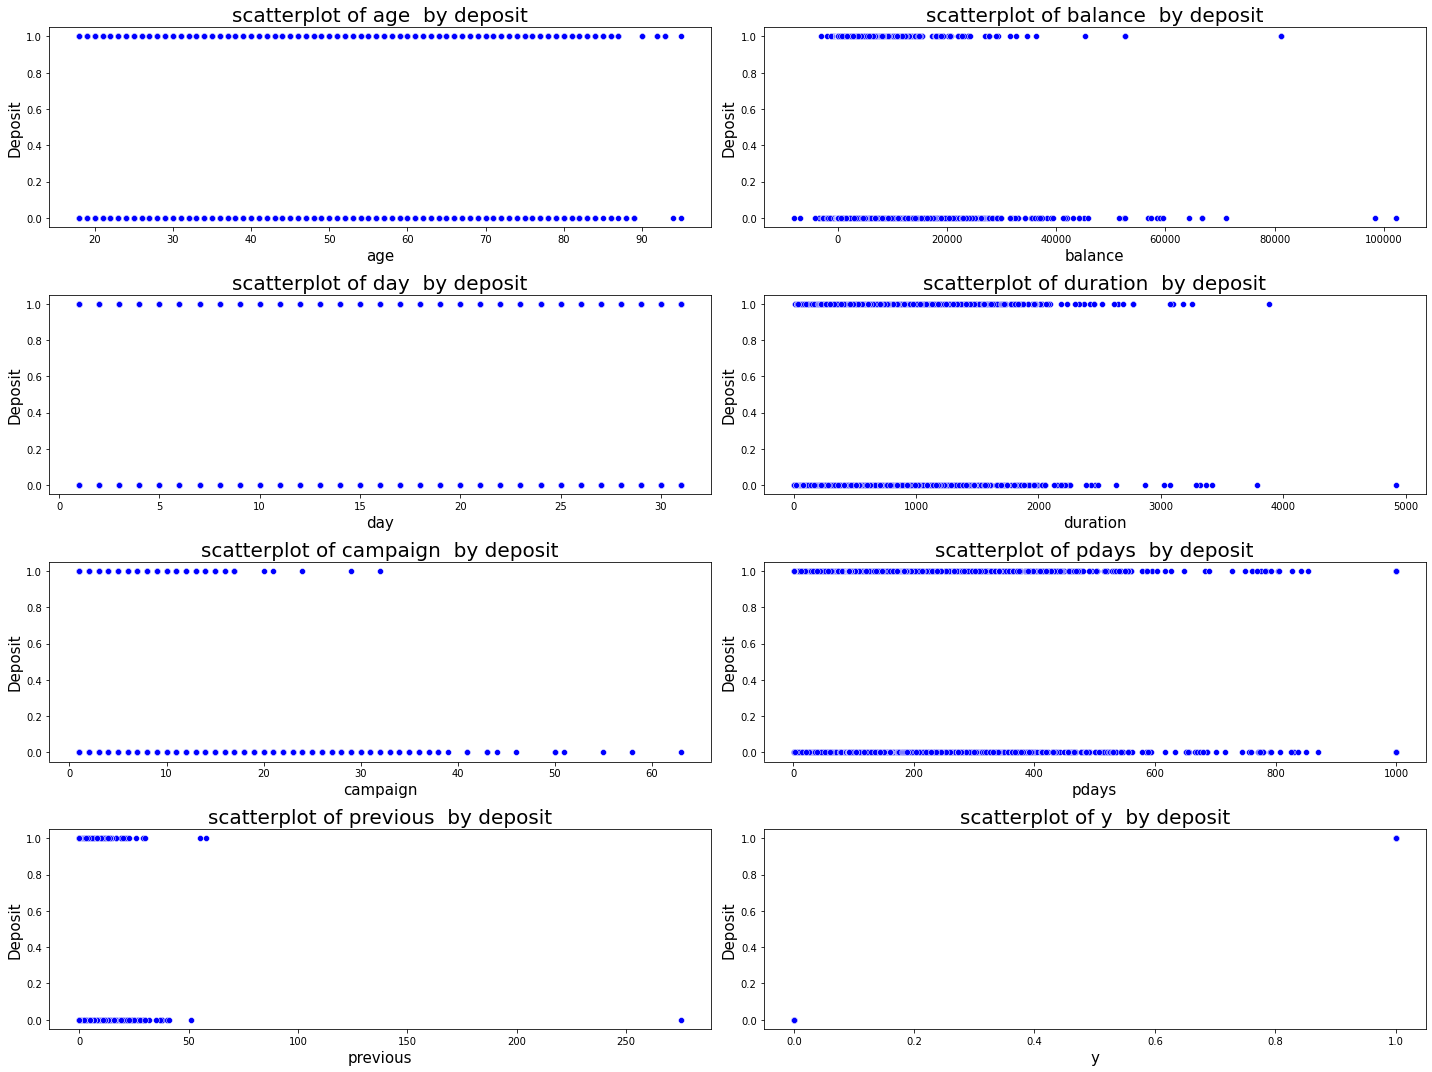

In [41]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','y']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','y']
plt.figure(figsize=(20,15))
for i,v in enumerate(col):
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=v,y='y' ,data=df_num,color='blue')
    plt.title("scatterplot of {}  by deposit".format(v),size=20)
    plt.xlabel("{}".format(v),size=15)
    plt.ylabel("Deposit",size=15)
plt.tight_layout()
plt.show()

**Detecting Outliers:**

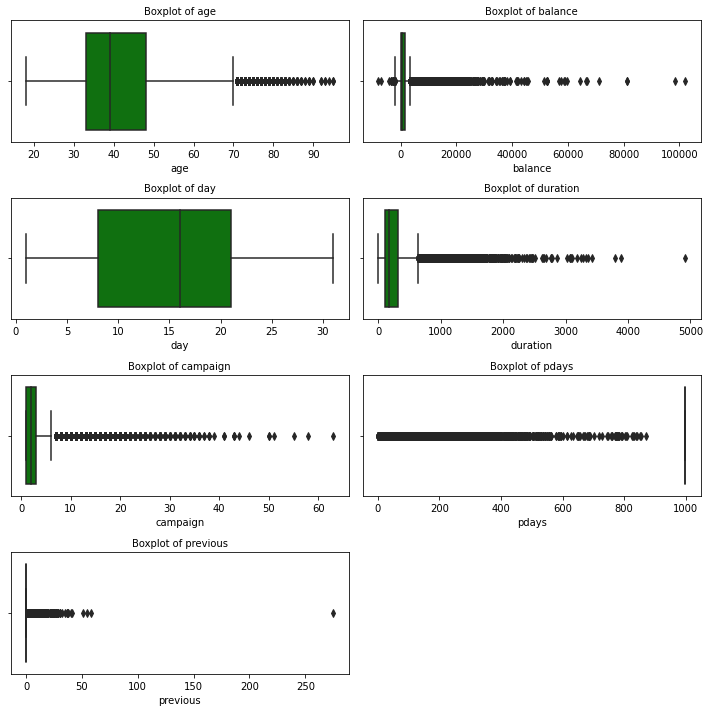

In [42]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10,10))
for i,v in enumerate(col):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num,color='green')
    plt.title("Boxplot of {}".format(v),size=10)
    plt.xlabel("{}".format(v),size=10)
plt.tight_layout()
plt.show()

**Handling Outliers:**

1. Age Column:

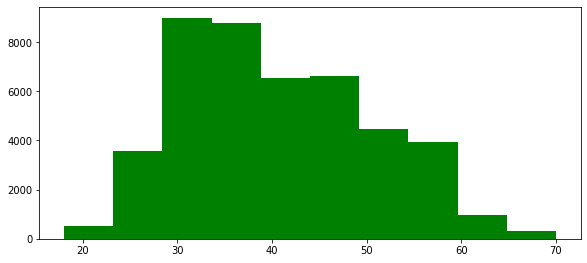

In [43]:
# Detection
# IQR
Q1 = np.percentile(df['age'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['age'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1


# Upper bound
upper = np.where(df['age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['age'] <= (Q1-1.5*IQR))

# Removing the Outliers 
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

plt.hist(x="age",data=df,color='green')
plt.show()

2. Balance Column

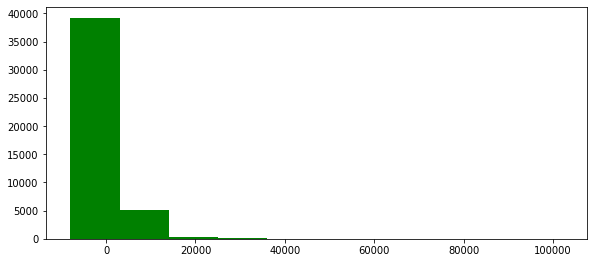

In [44]:
Q1=df.balance.quantile(0.25)
Q3=df.balance.quantile(0.75)
IQR=Q3-Q1


balance_lower_limit=Q1 - 1.5*IQR
balance_upper_limit=Q1 + 1.5*IQR

df[(df.balance>balance_lower_limit)|(df.balance<balance_upper_limit)]
df[(df.balance>balance_lower_limit)&(df.balance<balance_upper_limit)]

plt.hist(x="balance",data=df,color='green')
plt.show()

3. Duration Column:


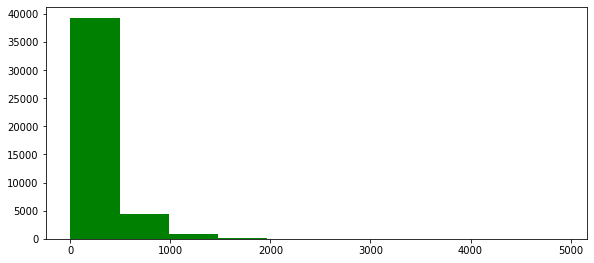

In [45]:
Q1=df.duration.quantile(0.25)
Q3=df.duration.quantile(0.75)
IQR=Q3-Q1


dur_lower_limit=Q1 - 1.5*IQR
dur_upper_limit=Q1 + 1.5*IQR

df[(df.duration>dur_lower_limit)|(df.duration<dur_upper_limit)]
df[(df.duration>dur_lower_limit)&(df.duration<dur_upper_limit)]

plt.hist(x="duration",data=df,color='green')
plt.show()

4. Campaign Column:


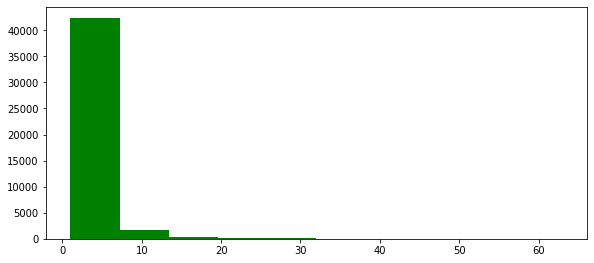

In [46]:
Q1=df.campaign.quantile(0.25)
Q3=df.campaign.quantile(0.75)
IQR=Q3-Q1


campaign_lower_limit=Q1 - 1.5*IQR
campaign_upper_limit=Q1 + 1.5*IQR

df[(df.campaign>campaign_lower_limit)|(df.campaign<campaign_upper_limit)]
df[(df.campaign>campaign_lower_limit)&(df.campaign<campaign_upper_limit)]

plt.hist(x="campaign",data=df,color='green')
plt.show()

5. Pdays Column:


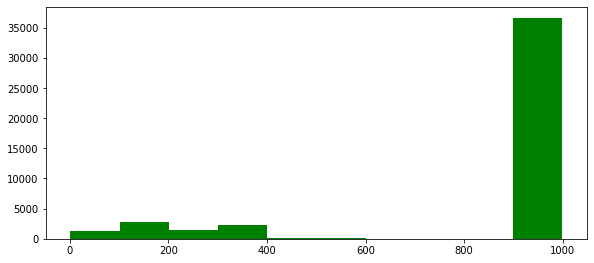

In [47]:
Q1=df.pdays.quantile(0.25)
Q3=df.pdays.quantile(0.75)
IQR=Q3-Q1


pdays_lower_limit=Q1 - 1.5*IQR
pdays_upper_limit=Q1 + 1.5*IQR

df[(df.pdays>pdays_lower_limit)|(df.pdays<pdays_upper_limit)]
df[(df.pdays>pdays_lower_limit)&(df.pdays<pdays_upper_limit)]

plt.hist(x="pdays",data=df,color='green')
plt.show()

6. Previous Column:

In [48]:
Q1=df.previous.quantile(0.25)
Q3=df.previous.quantile(0.75)
IQR=Q3-Q1


prev_lower_limit=Q1 - 1.5*IQR
prev_upper_limit=Q1 + 1.5*IQR

df[(df.previous>prev_lower_limit)|(df.previous<prev_upper_limit)]
df[(df.previous>prev_lower_limit)&(df.previous<prev_upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44724 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44724 non-null  int64 
 1   job        44724 non-null  object
 2   marital    44724 non-null  object
 3   education  44724 non-null  object
 4   default    44724 non-null  object
 5   balance    44724 non-null  int64 
 6   housing    44724 non-null  object
 7   loan       44724 non-null  object
 8   contact    44724 non-null  object
 9   day        44724 non-null  int64 
 10  month      44724 non-null  object
 11  duration   44724 non-null  int64 
 12  campaign   44724 non-null  int64 
 13  pdays      44724 non-null  int64 
 14  previous   44724 non-null  int64 
 15  poutcome   44724 non-null  object
 16  y          44724 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 7.1+ MB


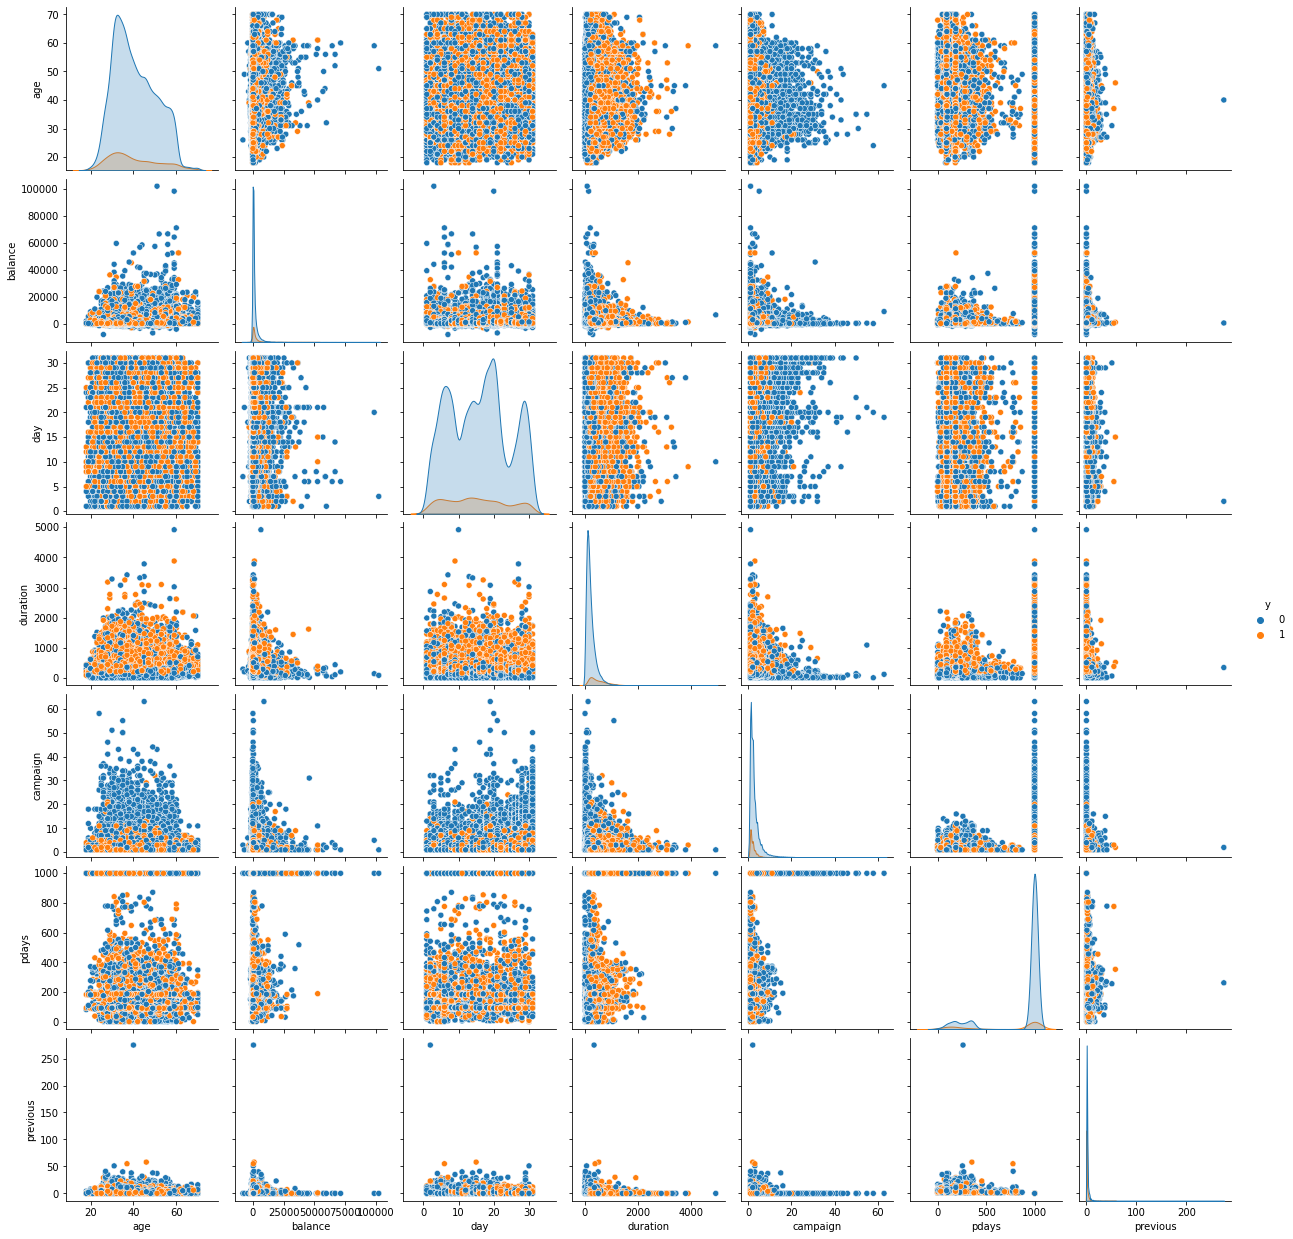

In [50]:
sns.pairplot(df, hue='y')

In [51]:
df.shape

(44724, 17)

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,999,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,999,0,failure,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,999,0,failure,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,999,0,failure,0
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,999,0,failure,0


In [53]:
df.to_csv('sql_bank_analysis.csv')

**Encoding of Categorical Features:**

A categorical variable is one that has two or more categories (values).


There are two types of categorical variable, nominal and ordinal.
A nominal variable has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories. An ordinal variable has a clear ordering.

In [54]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,999,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,999,0,failure,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,999,0,failure,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,999,0,failure,0
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,999,0,failure,0


In [55]:
#create dict for binary encoding
from sklearn.preprocessing import LabelEncoder
dic = {"yes":1,"no":0}
lst = ["default","housing","loan",]
for i in lst:
    df[i] = df[i].map(dic)

In [56]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,999,0,failure,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,999,0,failure,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,999,0,failure,0
3,47,blue-collar,married,secondary,0,1506,1,0,unknown,5,may,92,1,999,0,failure,0
4,33,blue-collar,single,secondary,0,1,0,0,unknown,5,may,198,1,999,0,failure,0


In [57]:
# Ordinal Encoding
l=['month',"contact","poutcome"]
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].values)

In [58]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,2,5,8,261,1,999,0,0,0
1,44,technician,single,secondary,0,29,1,0,2,5,8,151,1,999,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,2,5,8,76,1,999,0,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,2,5,8,92,1,999,0,0,0
4,33,blue-collar,single,secondary,0,1,0,0,2,5,8,198,1,999,0,0,0


OneHot Encoding:

In [59]:
df = pd.get_dummies(df, columns = ['job','marital','education'])

In [60]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,2,5,8,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,2,5,8,151,1,...,0,0,1,0,0,0,1,0,1,0
2,33,0,2,1,1,2,5,8,76,1,...,0,0,0,0,0,1,0,0,1,0
3,47,0,1506,1,0,2,5,8,92,1,...,0,0,0,0,0,1,0,0,1,0
4,33,0,1,0,0,2,5,8,198,1,...,0,0,0,0,0,0,1,0,1,0


In [61]:
df=df.reset_index()

In [62]:
df.drop('index',axis=1,inplace=True)


In [63]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,2,5,8,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,2,5,8,151,1,...,0,0,1,0,0,0,1,0,1,0
2,33,0,2,1,1,2,5,8,76,1,...,0,0,0,0,0,1,0,0,1,0
3,47,0,1506,1,0,2,5,8,92,1,...,0,0,0,0,0,1,0,0,1,0
4,33,0,1,0,0,2,5,8,198,1,...,0,0,0,0,0,0,1,0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44724 entries, 0 to 44723
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44724 non-null  int64
 1   default              44724 non-null  int64
 2   balance              44724 non-null  int64
 3   housing              44724 non-null  int64
 4   loan                 44724 non-null  int64
 5   contact              44724 non-null  int64
 6   day                  44724 non-null  int64
 7   month                44724 non-null  int64
 8   duration             44724 non-null  int64
 9   campaign             44724 non-null  int64
 10  pdays                44724 non-null  int64
 11  previous             44724 non-null  int64
 12  poutcome             44724 non-null  int64
 13  y                    44724 non-null  int64
 14  job_admin.           44724 non-null  uint8
 15  job_blue-collar      44724 non-null  uint8
 16  job_entrepreneur     4

In [65]:
X=df.iloc[:,0:30]
Y=df.iloc[:,30]

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [66]:
X[0]

array([ 1.74927502, -0.13615402,  0.26738379,  0.88349068, -0.4395235 ,
        1.5067683 , -1.29886761,  0.8263405 ,  0.01410173, -0.56961789,
        0.46316065, -0.24923974, -0.26293235, -0.35760928, -0.36145569,
       -0.53698816, -0.18532133, -0.16774365,  1.93266754, -0.20655099,
       -0.19092769, -0.31998583, -0.14636384, -0.45224401, -0.17322968,
       -0.35868218,  0.81597942, -0.63244563, -0.41733254, -1.11952011])

In [67]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
fit=pca.fit(X)

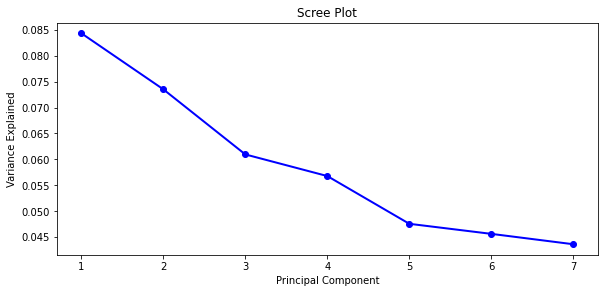

In [68]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

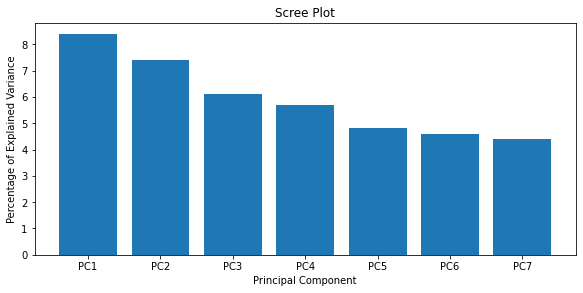

In [69]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

**Conclusion of the project:**

1. Married customers are less likely to subscribe for term deposit.
 compare with single and divorced
3. Secondary educatiON people are more likely to subscribe for    the  term depositcompare to tertiary and primary

4. Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

5. Although in absolute terms married consumers more often agreed to the service, in relative terms the divorced were responded better.

6. most correlated with target feature is call duration.